In [1]:
import pandas as pd
import os
from omegaconf import OmegaConf
import torch
from models.actor import InterpretableNormalActor, \
    InterpretableDirichletActor, InterpretableBetaActor, \
    InterpretableDeltaActor
from utils import log_results
import seaborn as sns
actor_types = {
    'normal': InterpretableNormalActor,
    'dirichlet': InterpretableDirichletActor,
    'beta': InterpretableBetaActor,
    'delta': InterpretableDeltaActor,
}
# actor_params = args.actor.value['{}_params'.format(
#     args.actor.value.type)]
# actor_params.update(args.actor.value['shared_params'])
# actor = actor_types[args.actor.value.type](actor_params)
def get_train_eval_df(outdir):
    args = OmegaConf.load(os.path.join(outdir, 'config.yaml'))
    val_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('val_metrics')}
    train_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('train_metrics')}
    ckpt_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('ckpt')}
    rows = []
    for k in ckpt_files.keys():
        if k not in val_files.keys() or k not in train_files.keys():
            continue
        rows.append({'epoch': k, 'ckpt_file': ckpt_files[k]})
        # state_dict = torch.load(os.path.join(outdir, ckpt_files[k]), map_location='cpu')['actor']
        # actor.load_state_dict(state_dict)
        actor = None
        val_results = pd.read_csv(os.path.join(outdir, val_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, val_results, 'val', actor=actor))
        train_results = pd.read_csv(os.path.join(outdir, train_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, train_results, 'train', actor=actor))
    return pd.DataFrame(rows)

/work/frink/mcinerney.de/envs/ehragent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch                                         145
val_auroc_macro                          0.816176
ckpt_file          ckpt_epoch=145_updates=1160.pt
Name: 10, dtype: object

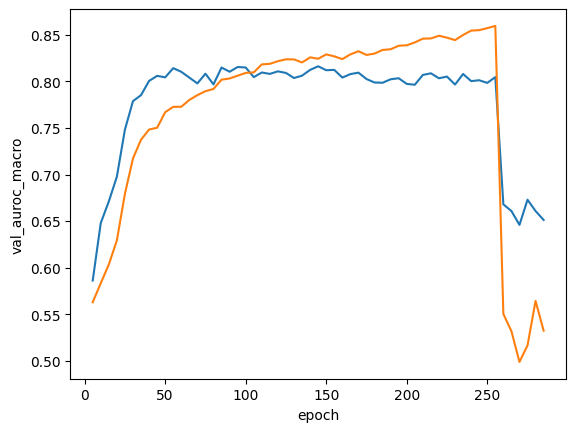

In [2]:
df = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')
df.sort_values('val_auroc_macro')[['epoch', 'val_auroc_macro', 'ckpt_file']].iloc[-1]

epoch                                        95
val_auroc_macro                          0.7903
ckpt_file          ckpt_epoch=95_updates=679.pt
Name: 133, dtype: object

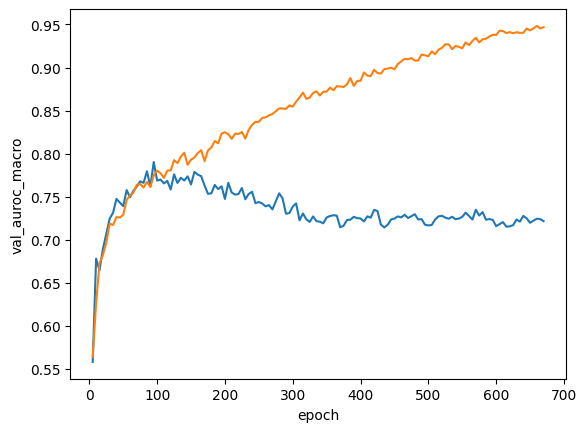

In [31]:
df = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')
df.sort_values('val_auroc_macro')[['epoch', 'val_auroc_macro', 'ckpt_file']].iloc[-1]